In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
class Image:
    def __init__(self, path):
        self.image = cv2.imread(path, 0)
        print('the input', self.image)

    def show_image(self):
        cv2.imshow('Before modification', self.image)
        cv2.waitKey(0)

    def midpoint_filter(self, window_size):
        height, width = self.image.shape
        output = np.zeros_like(self.image)
        window_half = window_size // 2

        for i in range(window_half, height - window_half):
            for j in range(window_half, width - window_half):
                window = self.image[i - window_half: i + window_half + 1, j - window_half: j + window_half + 1]
                min_value = np.min(window)
                max_value = np.max(window)
                midpoint = (min_value + max_value) // 2
                output[i, j] = midpoint
        print("the output",output)
        return output


the input [[240 240 240 ... 255 255 255]
 [240 240 240 ... 255 255 255]
 [240 240 240 ... 255 255 255]
 ...
 [255 255 255 ... 112 112 114]
 [255 255 255 ... 112 112 114]
 [255 255 255 ...  88  88 106]]


C:\Users\steve\AppData\Local\Temp\ipykernel_12228\3752470371.py:20: RuntimeWarning: overflow encountered in ubyte_scalars
  midpoint = (min_value + max_value) // 2


the output [[  0   0   0 ...   0   0   0]
 [  0 112 112 ... 127 127   0]
 [  0 112 112 ... 127 127   0]
 ...
 [  0 127 127 ...  91  92   0]
 [  0 127 127 ...  97 101   0]
 [  0   0   0 ...   0   0   0]]


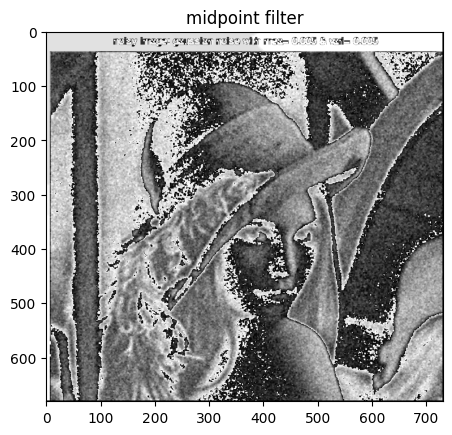

In [10]:
img=Image("Noisy-image-Gaussian-noise-with-mean-and-variance-0005.png")
# img.show_image()
window_size = 3
filtered_image = img.midpoint_filter(window_size)
plt.title('midpoint filter')
plt.imshow(filtered_image, cmap='gray')
plt.show()